# Import Library and Load Dataset

In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load Dataset
df_hotel = pd.read_csv('hotel_bookings_data.csv')
df_hotel.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
26710,Resort Hotel,0,0,2018,October,33,7,1,0,2,...,0,No Deposit,NaN,NaN,0,Personal,134.10,0,0,Check-Out
49736,City Hotel,0,105,2018,June,17,18,1,3,2,...,0,No Deposit,9.0,NaN,0,Personal,82.45,0,0,Check-Out
96036,City Hotel,0,143,2018,October,35,25,0,3,2,...,0,No Deposit,36.0,NaN,0,Family,100.00,0,0,Check-Out
13300,Resort Hotel,1,192,2019,October,32,7,2,5,2,...,1,No Deposit,5.0,NaN,0,Personal,164.00,0,0,Canceled
15750,Resort Hotel,0,3,2017,September,31,30,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,195.00,1,3,Check-Out


# Data Preprocessing

In [ ]:
#check info data
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#check missing values
df_hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
#Check descriptive statistics for numeric data type
df_hotel.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
#check descriptive statistics for categorical data type
df_hotel.describe(include = object).transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


## Handling Missing Value

In [ ]:
#handling missing values
df_new = df_hotel.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
miss_value = (df_new.isna().sum()/len(df_new))*100
print(miss_value.sort_values(ascending = False))

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

In [ ]:
#check value counts from city variable
df_new['city'].value_counts()

Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

Terdapat beberapa fitur yang nilainya kosong, yaitu pada fitur company, agent, city, dan children. Beberapa langkah untuk handle missing value dari fitur tersebut, yaitu:
- Company: akan diisi dengan 0 karena diasumsikan customer memesan hotel secara personal tanpa melalui suatu company.
- Agent: sama halnya dengan fitur company, akan diisi dengan 0 karena diasumsikan customer memesan hotel secara personal tanpa melalui suatu agent.
- City: akan diisi dengan most frequent kota pada fitur city, yaitu kota Denpasar karena setiap customer seharusnya memiliki kota asal sehingga fitur city yang kosong diasumsikan berasal dari kota Denpasar.
- Children: akan diisi dengan 0 karena diasumsikan customer tidak membawa anak.

In [ ]:
#Filling mising value
##for numerical variable
df_new['company'].fillna(value = 0, inplace = True)
df_new['agent'].fillna(value = 0, inplace = True)
df_new['children'].fillna(value = 0, inplace = True)

##for categorical variable
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(strategy = 'most_frequent')
df_new['city'] = imp_mode.fit_transform(df_new['city'].values.reshape(-1,1))
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#recheck df_new descriptive statistics for numerical variable
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
#recheck df_new descriptive statistics for numerical variable
df_new.describe(include = object).transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,119390,177,Kota Denpasar,49078
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


In [ ]:
#check value counts for categorical variable
cats = df_new.select_dtypes(include = object).columns
df_new[cats].value_counts()

hotel         arrival_date_month  meal       city                 market_segment  distribution_channel  deposit_type  customer_type  reservation_status
City Hotel    July                Breakfast  Kota Denpasar        Groups          TA/TO                 Non Refund    Personal       Canceled              942
              August              Breakfast  Kota Denpasar        Offline TA/TO   TA/TO                 Non Refund    Personal       Canceled              917
              June                Breakfast  Kota Denpasar        Groups          TA/TO                 Non Refund    Personal       Canceled              687
              November            Breakfast  Kota Denpasar        Groups          TA/TO                 Non Refund    Personal       Canceled              667
              August              Breakfast  Kota Denpasar        Groups          TA/TO                 Non Refund    Personal       Canceled              655
                                                     

Terdapat value **'Undefined'** pada fitur meal yang akan diganti menjadi suatu value tertentu. Pengambilan putusan mengenai value yang akan digantikan dibahas sebagai berikut.

## Replace The Inappropriate Value

In [ ]:
#check value count for meal
df_new['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Terdapat beberapa value yang tidak sesuai pada fitur 'meal' yang akan diganti menjadi 'No Meal' karena diasumsikan fitur yang tidak terdefinisi dengan jelas 'Undefined' merupakan customer yang tidak memesan makanan apapun baik pada waktu Breakfast, Dinner, maupun Full Board (Breakfast + Dinner).

In [ ]:
df_new.replace({'meal':{'Undefined':'No Meal'}}, inplace = True)
df_new['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [ ]:
#recheck df_new info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Terdapat beberapa tipe data yang tidak sesuai, yaitu pada fitur Children, Agent, and Company yang seharusnya memiliki tipe data integer bukan tipe data float.

In [ ]:
#change data type
df_new = df_new.astype({'children': 'int64', 'agent':'int64','company':'int64'})
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

## Drop Unnecessary Data

In [ ]:
# Remove unnecessary data with 0 guest and 0 night
# Create new column 'total_guests' from the combination of 'adults', 'children', 'babies' columns
df_new['total_guests'] = df_new['adults'] + df_new['children'] + df_new['babies']
print('Data dengan 0 tamu ada', len(df_new[df_new['total_guests'] == 0]), 'data dari', len(df_new), 'data yang tersedia')
# Create new column 'stay_duration' from the combination of 'stays_in_weekend_nights' and 'stays_in_weekdays_nights'
df_new['stay_duration'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_weekdays_nights']
print('Data dengan 0 stay duration ada', len(df_new[df_new['stay_duration'] == 0]), 'data dari', len(df_new), 'data yang tersedia')

Data dengan 0 tamu ada 180 data dari 119390 data yang tersedia
Data dengan 0 stay duration ada 715 data dari 119390 data yang tersedia


In [ ]:
#Drop unnecessary data
df_fix = df_new[(df_new['total_guests'] > 0) & (df_new['stay_duration'] > 0)]
print('Jumlah data before preprocessing ada', len(df_new), 'data')
print('Jumlah data after preprocessing ada', len(df_fix), 'data')

Jumlah data before preprocessing ada 119390 data
Jumlah data after preprocessing ada 118565 data


# Monthly Hotel Booking Analysis Based on Hotel Type

In [ ]:
df_fix.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
105152,City Hotel,0,1,2019,March,4,25,2,4,1,...,73,0,0,Family,65.0,0,0,Check-Out,1,6
89000,City Hotel,0,55,2018,July,20,13,1,2,3,...,9,0,0,Personal,159.3,0,2,Check-Out,3,3
4345,Resort Hotel,1,49,2018,May,10,5,2,2,2,...,0,0,0,Family,81.0,0,0,Canceled,2,4
76773,City Hotel,1,395,2018,May,13,21,1,2,2,...,1,0,0,Personal,62.8,0,0,Canceled,2,3
24398,Resort Hotel,0,0,2018,January,49,28,1,0,1,...,0,323,0,Personal,30.0,0,0,Check-Out,1,1


In [ ]:
df_fix.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'total_guests', 'stay_duration'],
      dtype='object')

In [ ]:
# comparison of the number of hotel bookings each month by type of hotel
df_group1 = df_fix.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique',
                                                                'is_canceled':'count'}).reset_index().rename(
    columns = {'arrival_date_year':'nunique_of_year','is_canceled':'total_booking'})
df_group1

,hotel,arrival_date_month,nunique_of_year,total_booking
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


In [ ]:
# data normalization for each month
df_group1 = df_group1.assign(avg_total_booking = round(df_group1['total_booking']/df_group1['nunique_of_year'],2))
df_group1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel               24 non-null     object 
 1   arrival_date_month  24 non-null     object 
 2   nunique_of_year     24 non-null     int64  
 3   total_booking       24 non-null     int64  
 4   avg_total_booking   24 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB


In [ ]:
# sort data by month
df_group1['arrival_date_month'] = pd.Categorical(df_group1['arrival_date_month'],
                                                 categories = ['January','February', 'March','April',
                                                                'May','June','July','August',
                                                                'September', 'October', 'November', 'December'],
                                                ordered = True)

df_group1 = df_group1.sort_values(['hotel','arrival_date_month']).reset_index(drop = True)
df_group1

,hotel,arrival_date_month,nunique_of_year,total_booking,avg_total_booking
0,City Hotel,January,2,4309,2154.50
1,City Hotel,February,2,4097,2048.50
2,City Hotel,March,2,3712,1856.00
3,City Hotel,April,2,4917,2458.50
4,City Hotel,May,2,6411,3205.50
5,City Hotel,June,2,7458,3729.00
6,City Hotel,July,2,8184,4092.00
7,City Hotel,August,2,7874,3937.00
8,City Hotel,September,3,8054,2684.67
9,City Hotel,October,3,8952,2984.00


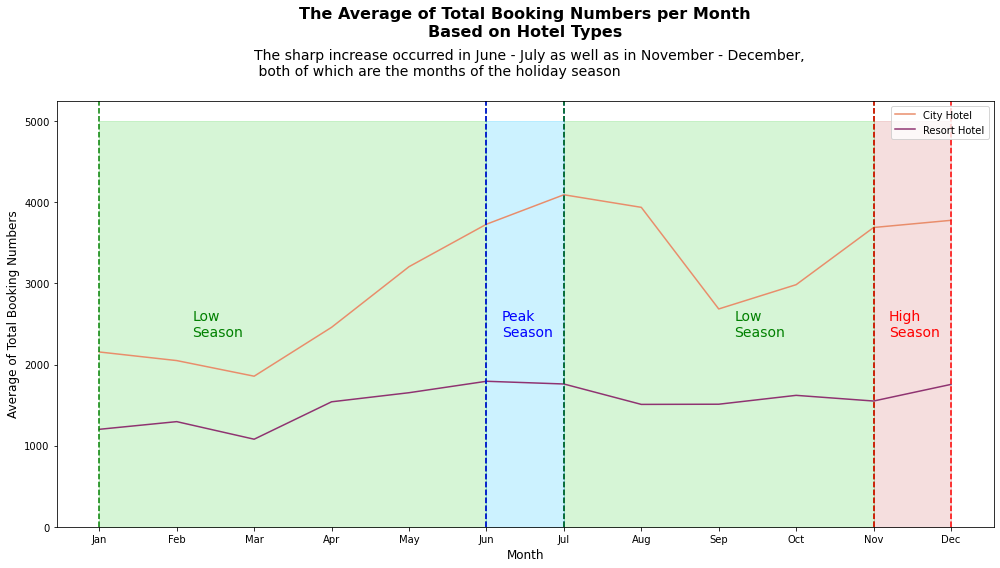

In [ ]:
# plot of data visualization
plt.figure(figsize = (14,8))
plt.title("The Average of Total Booking Numbers per Month\nBased on Hotel Types", fontsize = 16, color = 'black', weight = 'bold', pad = 65)
plt.text(x = 2, y = 5560,
         s = 'The sharp increase occurred in June - July as well as in November - December,\n both of which are the months of the holiday season',
         fontsize = 14)

my_colors = ['#e98d6b', '#8f3371']
sns.set_palette(my_colors)

sns.lineplot(data = df_group1, x = 'arrival_date_month', y = 'avg_total_booking', hue = 'hotel')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average of Total Booking Numbers', fontsize = 12)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.axvline('January', ls='--', color='green')
plt.axvline('June', ls='--', color='green')
plt.stackplot(np.arange(0,6), [[5000]], color='limegreen', alpha=0.2)
plt.text(x = 1.2, y = 2500, s='Low\nSeason', fontsize=14, color='green', va='center')

plt.axvline('June', color='blue', linestyle='--')
plt.axvline('July', color='blue', linestyle='--')
plt.stackplot(np.arange(5,7), [[5000]], color='deepskyblue', alpha=0.2)
plt.text(x=5.2, y=2500, s='Peak\nSeason', fontsize=14, color='blue', va='center')

plt.axvline('July', color='green', linestyle='--')
plt.axvline('November', color='green', linestyle='--')
plt.stackplot(np.arange(6,11), [[5000]], color='limegreen', alpha=0.2)
plt.text(x=8.2, y=2500, s='Low\nSeason', fontsize=14, color='green', va='center')

plt.axvline('November', ls='--', color='red')
plt.axvline('December', ls='--', color='red')
plt.stackplot(np.arange(10,12), [[5000]], color='indianred', alpha=0.2)
plt.text(x = 10.2, y = 2500, s='High\nSeason', fontsize=14, color='red', va='center')

plt.legend(loc = 'best')
plt.tight_layout()
plt.savefig('avg_total_booking')

Interpretasi:
- Pemesanan hotel rata-rata meningkat pada musim libur peak season dan high season. Musim libur peak season terjadi pada bulan Juni - Juli sebab terdapat libur sekolah dan libur mudik lebaran hari raya idul fitri dengan durasi waktu yang panjang. Musim libur high season memiliki durasi yang lebih singkat dibanding dengan musim libur peak season yang terjadi pada bulan November - Desember karena pada bulan ini terdapat libur sekolah juga dan libur natal yang tidak sepanjang pada bulan Juni - Juli.
- Pemesanan hotel mulai berkurang sepanjang musim libur low season yang terjadi sepanjang bulan Januari - Juni juga terjadi pada bulan Juli - November. Pada musim low season ini sebaiknya pihak hotel memberikan diskon/voucher potongan agar customer tetap berminat melakukan kunjungan di hotel tersebut.

- Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)

- Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)

- Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)

- Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)

- Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [ ]:
df_fix.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
76519,City Hotel,1,195,2017,November,38,17,0,2,2,...,20,0,0,Personal,48.00,0,0,Canceled,2,2
104573,City Hotel,0,12,2019,March,3,16,1,1,1,...,9,0,0,Personal,90.00,0,1,Check-Out,1,2
101676,City Hotel,0,54,2018,January,46,11,2,3,2,...,7,0,0,Personal,77.25,0,1,Check-Out,2,5
103980,City Hotel,0,269,2018,February,53,29,2,3,1,...,12,0,0,Family,70.00,0,0,Check-Out,1,5
12717,Resort Hotel,1,31,2019,September,28,14,0,2,2,...,240,0,0,Personal,215.00,0,1,Canceled,2,2


Di data preprocessing sebelumnya sudah dilakukan penambahan kolom baru yang diberi nama 'stay_duration'. Kolom ini merupakan hasil penjumlahan dari kolom 'stay in_weekend_nights' dan kolom 'stay in_weekdays_nights'. Selanjutnya, akan dilakukan plot histogram untuk melihat persebaran data pada kolom ini.

In [ ]:
df_fix[['stay_duration']].sample(5)

,stay_duration
36226,3
30363,2
111074,6
35918,3
20393,1


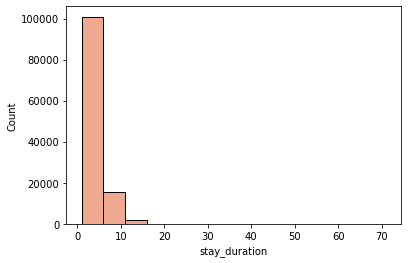

In [ ]:
# histogram plot
plt.figure(figsize = (6,4))
sns.histplot(data = df_fix, x = 'stay_duration', binwidth = 5)
plt.show()

In [ ]:
# display value count for stay_duration variable
df_fix['stay_duration'].value_counts()

2     27632
3     27064
1     21005
4     17373
7      8648
5      7771
6      3846
8      1155
10     1135
14      913
9       840
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: stay_duration, dtype: int64

Fitur stay_duration akan dikelompokkan menjadi 4 group sebagai berikut:
- group 1 : memiliki stay duration pada range 1 s.d. 7 hari
- group 2 : memiliki stay duration pada range 8 s.d. 14 hari
- group 3 : memiliki stay duration pada range 15 s.d. 21 hari
- group 4 : memiliki stay duration lebih dari 21 hari

In [ ]:
# define stay_duration_group feature
def stay_duration_group(x):
    if x['stay_duration'] >= 1 and x['stay_duration'] <= 7:
        stay_duration_group = 'group 1'
    elif x['stay_duration'] >= 8 and x['stay_duration'] <= 14:
        stay_duration_group = 'group 2'
    elif x['stay_duration'] >= 15 and x['stay_duration'] <= 21:
        stay_duration_group = 'group 3'
    else:
        stay_duration_group = 'group 4'
    return stay_duration_group

In [ ]:
df_fix['stay_duration_group'] = df_fix.apply(lambda x : stay_duration_group(x), axis = 1)
df_fix.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,stay_duration_group
63360,City Hotel,1,186,2019,April,6,9,1,3,2,...,0,0,Personal,85.00,0,0,Canceled,2,4,group 1
112604,City Hotel,0,208,2019,July,21,24,0,2,2,...,0,0,Family,114.40,0,0,Check-Out,2,2,group 1
117544,City Hotel,0,148,2019,September,30,29,2,6,2,...,0,0,Personal,121.88,0,1,Check-Out,2,8,group 2
14309,Resort Hotel,0,5,2018,August,26,21,0,2,1,...,9,0,Personal,65.00,0,0,Check-Out,1,2,group 1
33966,Resort Hotel,0,1,2019,May,10,9,0,1,2,...,0,0,Bussiness,52.00,0,1,Check-Out,2,1,group 1


In [ ]:
df_group2 = df_fix.groupby(['hotel', 'stay_duration_group',
                            'is_canceled']).agg({'stay_duration':'count'}).reset_index().rename(
columns = {'stay_duration' : 'canceled_number'})
df_group2 = df_group2[df_group2['is_canceled'] == 1]
df_group2

,hotel,stay_duration_group,is_canceled,canceled_number
1,City Hotel,group 1,1,32391
3,City Hotel,group 2,1,558
5,City Hotel,group 3,1,76
7,City Hotel,group 4,1,41
9,Resort Hotel,group 1,1,9907
11,Resort Hotel,group 2,1,1078
13,Resort Hotel,group 3,1,79
15,Resort Hotel,group 4,1,46


In [ ]:
df_group3 = df_fix.groupby(['hotel', 'stay_duration_group']).agg({'stay_duration':'count'}).reset_index()
df_group3

,hotel,stay_duration_group,stay_duration
0,City Hotel,group 1,77678
1,City Hotel,group 2,1069
2,City Hotel,group 3,105
3,City Hotel,group 4,47
4,Resort Hotel,group 1,35661
5,Resort Hotel,group 2,3728
6,Resort Hotel,group 3,169
7,Resort Hotel,group 4,108


In [ ]:
df_merge = pd.merge(df_group2, df_group3, on = ['hotel', 'stay_duration_group'], how = 'inner')
df_merge

,hotel,stay_duration_group,is_canceled,canceled_number,stay_duration
0,City Hotel,group 1,1,32391,77678
1,City Hotel,group 2,1,558,1069
2,City Hotel,group 3,1,76,105
3,City Hotel,group 4,1,41,47
4,Resort Hotel,group 1,1,9907,35661
5,Resort Hotel,group 2,1,1078,3728
6,Resort Hotel,group 3,1,79,169
7,Resort Hotel,group 4,1,46,108


In [ ]:
df_merge['cancellation_ratio'] = round(df_merge['canceled_number']*100/df_merge['stay_duration'], 2)
df_merge

,hotel,stay_duration_group,is_canceled,canceled_number,stay_duration,cancellation_ratio
0,City Hotel,group 1,1,32391,77678,41.70
1,City Hotel,group 2,1,558,1069,52.20
2,City Hotel,group 3,1,76,105,72.38
3,City Hotel,group 4,1,41,47,87.23
4,Resort Hotel,group 1,1,9907,35661,27.78
5,Resort Hotel,group 2,1,1078,3728,28.92
6,Resort Hotel,group 3,1,79,169,46.75
7,Resort Hotel,group 4,1,46,108,42.59


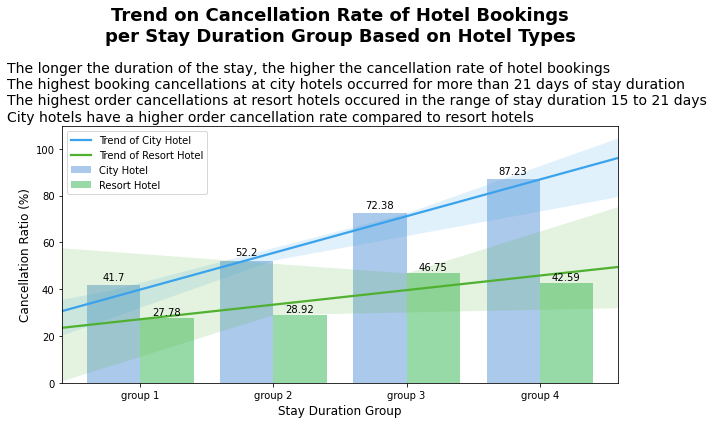

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Trend on Cancellation Rate of Hotel Bookings\nper Stay Duration Group Based on Hotel Types',
          fontsize = 18,
          color = 'black',
          weight = 'bold',
          pad = 85)

plt.text(x = -1, y = 112,
         s = 'The longer the duration of the stay, the higher the cancellation rate of hotel bookings\nThe highest booking cancellations at city hotels occurred for more than 21 days of stay duration\nThe highest order cancellations at resort hotels occured in the range of stay duration 15 to 21 days\nCity hotels have a higher order cancellation rate compared to resort hotels',
         fontsize = 14)

my_colors = ['#3ba3ec', '#50b131']
sns.set_palette(my_colors)

sns.barplot(data = df_merge,
            x = 'stay_duration_group',
            y = 'cancellation_ratio',
            hue = 'hotel', palette = "pastel6" )

sns.regplot(data = df_merge[df_merge['hotel'] == 'City Hotel'],
            x = np.arange(0, len(df_merge[df_merge['hotel'] == 'City Hotel'])),
            y = 'cancellation_ratio',
            label = 'Trend of City Hotel',
            scatter = False,
            truncate = False)

sns.regplot(data = df_merge[df_merge['hotel'] == 'Resort Hotel'],
            x = np.arange(0, len(df_merge[df_merge['hotel'] == 'Resort Hotel'])),
            y = 'cancellation_ratio',
            label = 'Trend of Resort Hotel',
            scatter = False,
            truncate = False)

plt.xlabel('Stay Duration Group', fontsize = 12)
plt.ylabel('Cancellation Ratio (%)', fontsize = 12)

plt.bar_label(ax.containers[0], padding = 3)
plt.bar_label(ax.containers[1], padding = 1)

plt.legend(loc = 'best')
plt.tight_layout()

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [ ]:
df_fix['lead_time'].value_counts()

0      6007
1      3386
2      2042
3      1804
4      1697
       ... 
389       1
387       1
400       1
370       1
463       1
Name: lead_time, Length: 478, dtype: int64

In [ ]:
# define lead_time_group feature
def lead_time_group(x):
    if x['lead_time'] >= 1 and x['lead_time'] <= 90:
        lead_time_group = 'Q1'
    elif x['lead_time'] >= 91 and x['lead_time'] <= 180:
        lead_time_group = 'Q2'
    elif x['lead_time'] >= 181 and x['lead_time'] <= 270:
        lead_time_group = 'Q3'
    elif x['lead_time'] >= 271 and x['lead_time'] <= 360:
        lead_time_group = 'Q4'
    else:
        lead_time_group = 'more than Q4'
    return lead_time_group

In [ ]:
df_fix['lead_time_group'] = df_fix.apply(lambda x : lead_time_group(x), axis = 1)
df_fix.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,stay_duration_group,lead_time_group
65845,City Hotel,1,66,2019,June,15,9,2,0,2,...,0,Personal,100.00,0,0,Canceled,2,2,group 1,Q1
36449,Resort Hotel,0,2,2019,July,20,20,0,1,2,...,0,Family,150.00,1,1,Check-Out,2,1,group 1,Q1
5527,Resort Hotel,1,186,2018,July,19,1,2,5,2,...,0,Personal,46.98,0,0,Canceled,2,7,group 1,Q3
55155,City Hotel,1,101,2018,October,32,6,2,1,2,...,0,Personal,107.10,0,0,Canceled,2,3,group 1,Q2
99381,City Hotel,0,27,2018,December,42,12,0,1,1,...,0,Personal,65.00,0,0,Check-Out,1,1,group 1,Q1


In [ ]:
df_group4 = df_fix.groupby(['hotel', 'lead_time_group',
                            'is_canceled']).agg({'lead_time':'count'}).reset_index().rename(
columns = {'lead_time' : 'canceled_number'})
df_group4 = df_group4[df_group4['is_canceled'] == 1].reset_index(drop = True)
df_group4

,hotel,lead_time_group,is_canceled,canceled_number
0,City Hotel,Q1,1,13212
1,City Hotel,Q2,1,8744
2,City Hotel,Q3,1,4310
3,City Hotel,Q4,1,4467
4,City Hotel,more than Q4,1,2333
5,Resort Hotel,Q1,1,4663
6,Resort Hotel,Q2,1,3074
7,Resort Hotel,Q3,1,2143
8,Resort Hotel,Q4,1,863
9,Resort Hotel,more than Q4,1,367


In [ ]:
df_group5 = df_fix.groupby(['hotel', 'lead_time_group']).agg({'lead_time':'count'}).reset_index()
df_group5

,hotel,lead_time_group,lead_time
0,City Hotel,Q1,40889
1,City Hotel,Q2,18200
2,City Hotel,Q3,8208
3,City Hotel,Q4,5857
4,City Hotel,more than Q4,5745
5,Resort Hotel,Q1,20635
6,Resort Hotel,Q2,8184
7,Resort Hotel,Q3,5144
8,Resort Hotel,Q4,2029
9,Resort Hotel,more than Q4,3674


In [ ]:
df_gab = pd.merge(df_group4, df_group5, on = ['hotel', 'lead_time_group'], how = 'inner')
df_gab

,hotel,lead_time_group,is_canceled,canceled_number,lead_time
0,City Hotel,Q1,1,13212,40889
1,City Hotel,Q2,1,8744,18200
2,City Hotel,Q3,1,4310,8208
3,City Hotel,Q4,1,4467,5857
4,City Hotel,more than Q4,1,2333,5745
5,Resort Hotel,Q1,1,4663,20635
6,Resort Hotel,Q2,1,3074,8184
7,Resort Hotel,Q3,1,2143,5144
8,Resort Hotel,Q4,1,863,2029
9,Resort Hotel,more than Q4,1,367,3674


In [ ]:
df_gab['cancellation_ratio'] = round(df_gab['canceled_number']*100/df_gab['lead_time'], 2)
df_gab

,hotel,lead_time_group,is_canceled,canceled_number,lead_time,cancellation_ratio
0,City Hotel,Q1,1,13212,40889,32.31
1,City Hotel,Q2,1,8744,18200,48.04
2,City Hotel,Q3,1,4310,8208,52.51
3,City Hotel,Q4,1,4467,5857,76.27
4,City Hotel,more than Q4,1,2333,5745,40.61
5,Resort Hotel,Q1,1,4663,20635,22.60
6,Resort Hotel,Q2,1,3074,8184,37.56
7,Resort Hotel,Q3,1,2143,5144,41.66
8,Resort Hotel,Q4,1,863,2029,42.53
9,Resort Hotel,more than Q4,1,367,3674,9.99


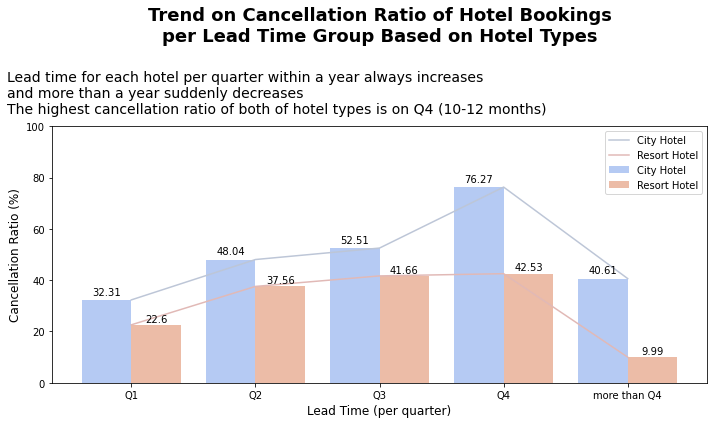

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Trend on Cancellation Ratio of Hotel Bookings\nper Lead Time Group Based on Hotel Types',
          fontsize = 18,
          color = 'black',
          weight = 'bold',
          pad = 85)

plt.text(x = -1, y = 105,
         s = 'Lead time for each hotel per quarter within a year always increases\nand more than a year suddenly decreases\nThe highest cancellation ratio of both of hotel types is on Q4 (10-12 months)',
         fontsize = 14)

sns.barplot(data = df_gab,
            x = 'lead_time_group',
            y = 'cancellation_ratio',
            hue = 'hotel', palette = 'coolwarm' )

sns.lineplot(data = df_gab,
             x = 'lead_time_group',
             y = 'cancellation_ratio',
             hue = 'hotel',
             palette = 'vlag')

plt.xlabel('Lead Time (per quarter)', fontsize = 12)
plt.ylabel('Cancellation Ratio (%)', fontsize = 12)

plt.bar_label(ax.containers[0], padding = 3)
plt.bar_label(ax.containers[1], padding = 1)

plt.legend(loc = 'best')

plt.ylim(0,100)

plt.tight_layout()